В этом блокноте мы научимся выполнять сглаживание и строить тренд временного ряда.

Для начала загрузим [данные](https://studio.openedu.ru/assets/courseware/v1/f9a98baa4e51f14b5448a7fdca8b125e/asset-v1:ITMOUniversity+DATANTECH2035+fall_2021+type@asset+block/task5_983784.csv) уже привычным нам образом

In [12]:
import pandas as pd
import numpy as np

data_series = pd.read_csv('https://studio.openedu.ru/assets/courseware/v1/f9a98baa4e51f14b5448a7fdca8b125e/asset-v1:ITMOUniversity+DATANTECH2035+fall_2021+type@asset+block/task5_983784.csv')

In [16]:
data_series

,y
1,17
2,25
3,16
4,17
5,7
...,...
96,131
97,132
98,163
99,143


В задании нумерация начинается с $1$, а у нас — с $0$. Исправим это, выполнив сдвиг индексов

In [17]:
data_series.index += 1 
data_series

,y
2,17
3,25
4,16
5,17
6,7
...,...
97,131
98,132
99,163
100,143


Напишем функцию самостоятельно:

In [18]:
def exponential_smoothing(series, alpha):
    result = [series[0]]
    for index in range(1, len(series)):
        result.append(alpha * series[index] + (1 - alpha) * result[index - 1]) 
    return result

Проведем сглаживание и запишем результат в столбец <code>y_exp_norm_user</code>

In [19]:
data_series['y_exp_norm_user'] = exponential_smoothing(data_series['y'].to_list(), 0.2)

In [20]:
data_series

,y,y_exp_norm_user
2,17,17.000000
3,25,18.600000
4,16,18.080000
5,17,17.864000
6,7,15.691200
...,...,...
97,131,132.155831
98,132,132.124665
99,163,138.299732
100,143,139.239785


Построим графики исходного и сглаженного рядов

In [21]:
import matplotlib.pyplot as plt

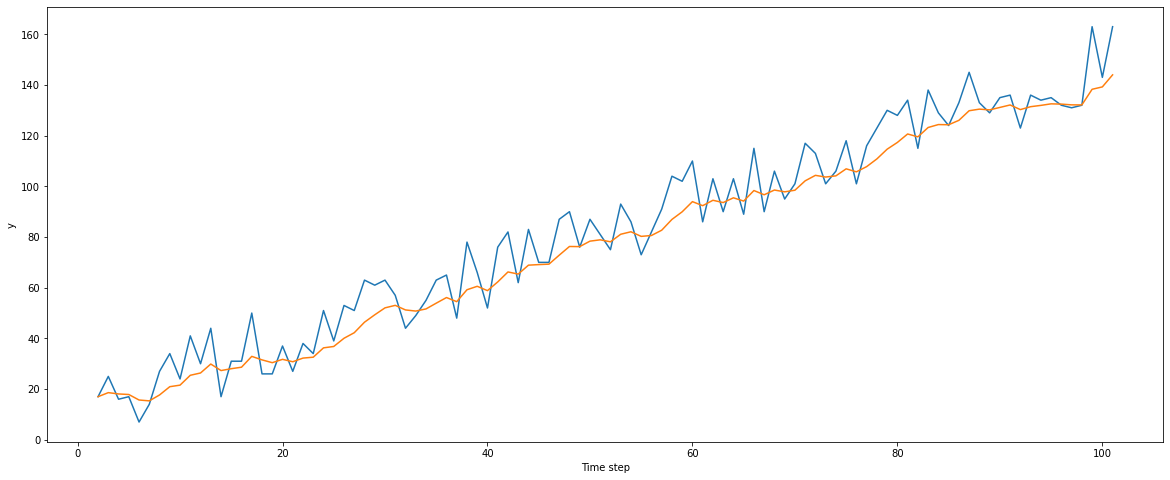

In [22]:
plt.figure(figsize=(20, 8))
plt.plot('y', data = data_series)
plt.plot('y_exp_norm_user', data = data_series)
plt.xlabel('Time step')
plt.ylabel('y')
plt.show()

Выведем 50-ую строку нашего набора данных

In [23]:
data_series.loc[[50]]

,y,y_exp_norm_user
50,87,78.373005


Выведем только 50-ое сглаженное значение

In [24]:
data_series['y_exp_norm_user'].loc[[50]]

50    78.373005
Name: y_exp_norm_user, dtype: float64

Округлим его до сотых

In [25]:
y50 = data_series['y_exp_norm_user'].loc[[50]]
round(y50, 2)

50    78.37
Name: y_exp_norm_user, dtype: float64

Теперь проведем экспоненциальное сглаживание нашего временного ряда, используя функцию <code>ewm</code>. Результат запишем в новый столбец <code>y_exp_norm</code>

In [26]:
data_series['y_exp_norm'] = data_series['y'].ewm(alpha = 0.2, adjust = False).mean()

In [27]:
data_series

,y,y_exp_norm_user,y_exp_norm
2,17,17.000000,17.000000
3,25,18.600000,18.600000
4,16,18.080000,18.080000
5,17,17.864000,17.864000
6,7,15.691200,15.691200
...,...,...,...
97,131,132.155831,132.155831
98,132,132.124665,132.124665
99,163,138.299732,138.299732
100,143,139.239785,139.239785


Построим графики исходного и сглаженного рядов

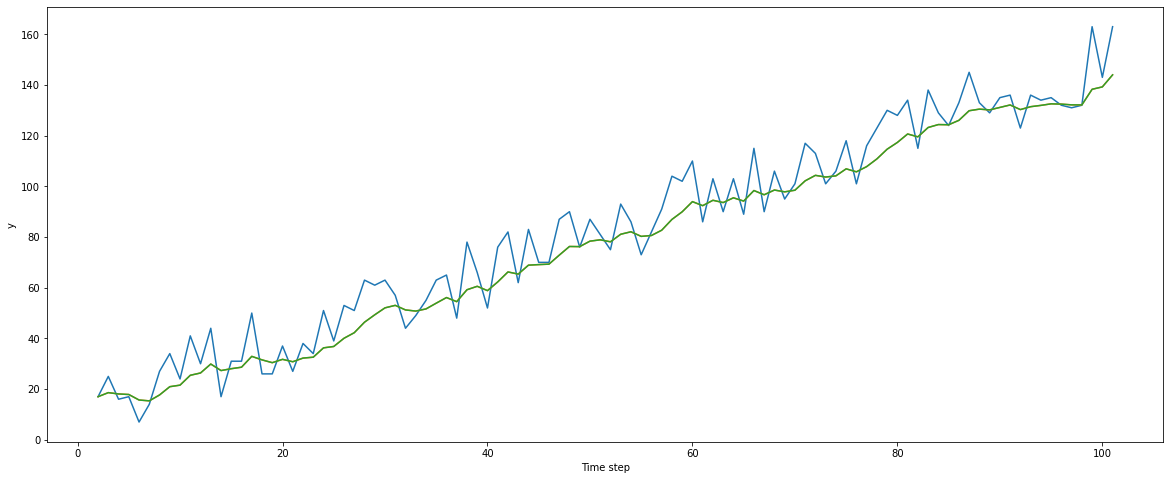

In [28]:
plt.figure(figsize=(20, 8))
plt.plot('y', data = data_series)
plt.plot('y_exp_norm', data = data_series)
plt.plot('y_exp_norm_user', data = data_series)
plt.xlabel('Time step')
plt.ylabel('y')
plt.show()

Сравним результаты

In [29]:
(data_series['y_exp_norm'] == data_series['y_exp_norm_user']).unique()

array([ True])

Рассмотрим отдельно значения временного ряда и соответсвующие им временные метки. Преобразуем тип данных в массив <code>numpy</code>:

In [30]:
import numpy as np
X = data_series.index.to_numpy()
y = data_series['y'].to_numpy()
X

array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101])

Найдем уравнение линейного тренда, используя функцию <code>polyfit</code>

In [31]:
poly = np.polyfit(X, y, 1)
print(poly)

[ 1.34990099 12.73009901]


In [32]:
a = round(poly[0], 2)
b = round(poly[1], 2)

Найдем значения ряда, используя уравнение тренда

In [33]:
x = np.arange(1, 101)
data_series['lin_trend'] = a * x + b

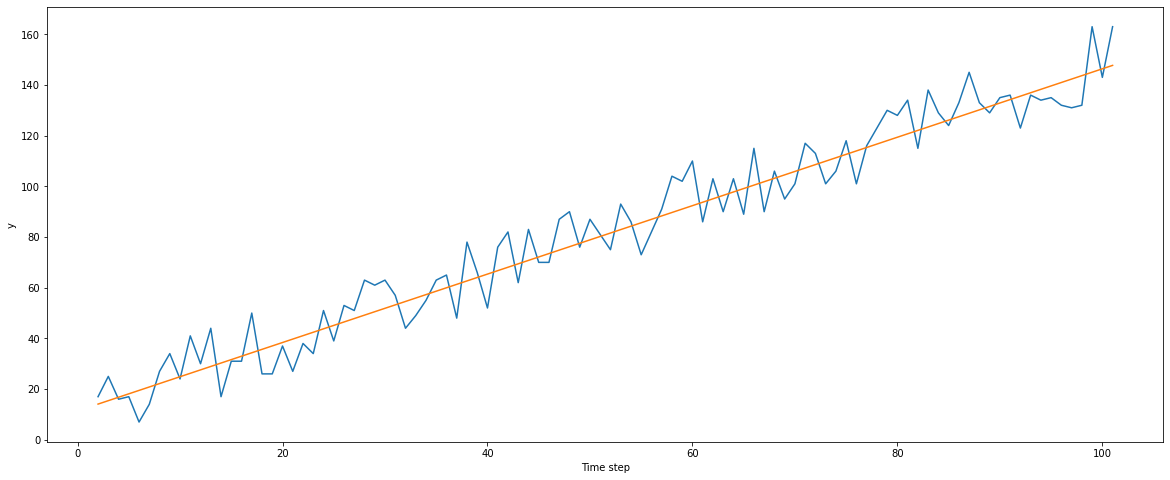

In [34]:
plt.figure(figsize=(20, 8))
plt.plot('y', data=data_series)
plt.plot('lin_trend', data=data_series)
plt.xlabel('Time step')
plt.ylabel('y')
plt.show()

Вычислим коэффициент детерминации

$R^{2}=1-\frac{\sum\limits_{i=1}^{n}\left(y_{i}-f_{i}\right)^{2}}{\sum\limits_{i=1}^{n}\left(y_{i}-y_{\mathrm{avg}}\right)^{2}}$

In [35]:
f_i = data_series['lin_trend']
y_avg = data_series['y'].mean()

In [36]:
R2 = 1 - ((y - f_i) ** 2).sum() / ((y - y_avg) ** 2).sum()

In [37]:
round(R2, 3)

0.948

Спрогнозируем $101$-ый член ряда

In [38]:
y_101 = a * 101 + b
round(y_101, 0)

149.0

In [ ]:
# Homework

In [62]:
data_2 = pd.read_csv('task5_994724.csv')
data_2

,y
0,25
1,5
2,36
3,38
4,20
...,...
95,285
96,277
97,277
98,293


In [63]:
data_2.index+=1
data_2

,y
1,25
2,5
3,36
4,38
5,20
...,...
96,285
97,277
98,277
99,293


In [80]:
data_2['y_exp_norm'] = data_2['y'].ewm(alpha = 0.17, adjust = False).mean()
data_2['a=20'] = data_2['y'].ewm(alpha = 0.20, adjust = False).mean()
data_2['a=5'] = data_2['y'].ewm(alpha = 0.05, adjust = False).mean()
data_2


,y,y_exp_norm,a=20,a=5
1,25,25.000000,25.000000,25.000000
2,5,21.600000,21.000000,24.000000
3,36,24.048000,24.000000,24.600000
4,38,26.419840,26.800000,25.270000
5,20,25.328467,25.440000,25.006500
...,...,...,...,...
96,285,266.864902,269.656097,225.780764
97,277,268.587869,271.124877,228.341726
98,277,270.017931,272.299902,230.774640
99,293,273.924883,276.439922,233.885908


In [81]:
round(data_2.loc[[100]],2)

,y,y_exp_norm,a=20,a=5
100,269,273.09,274.95,235.64


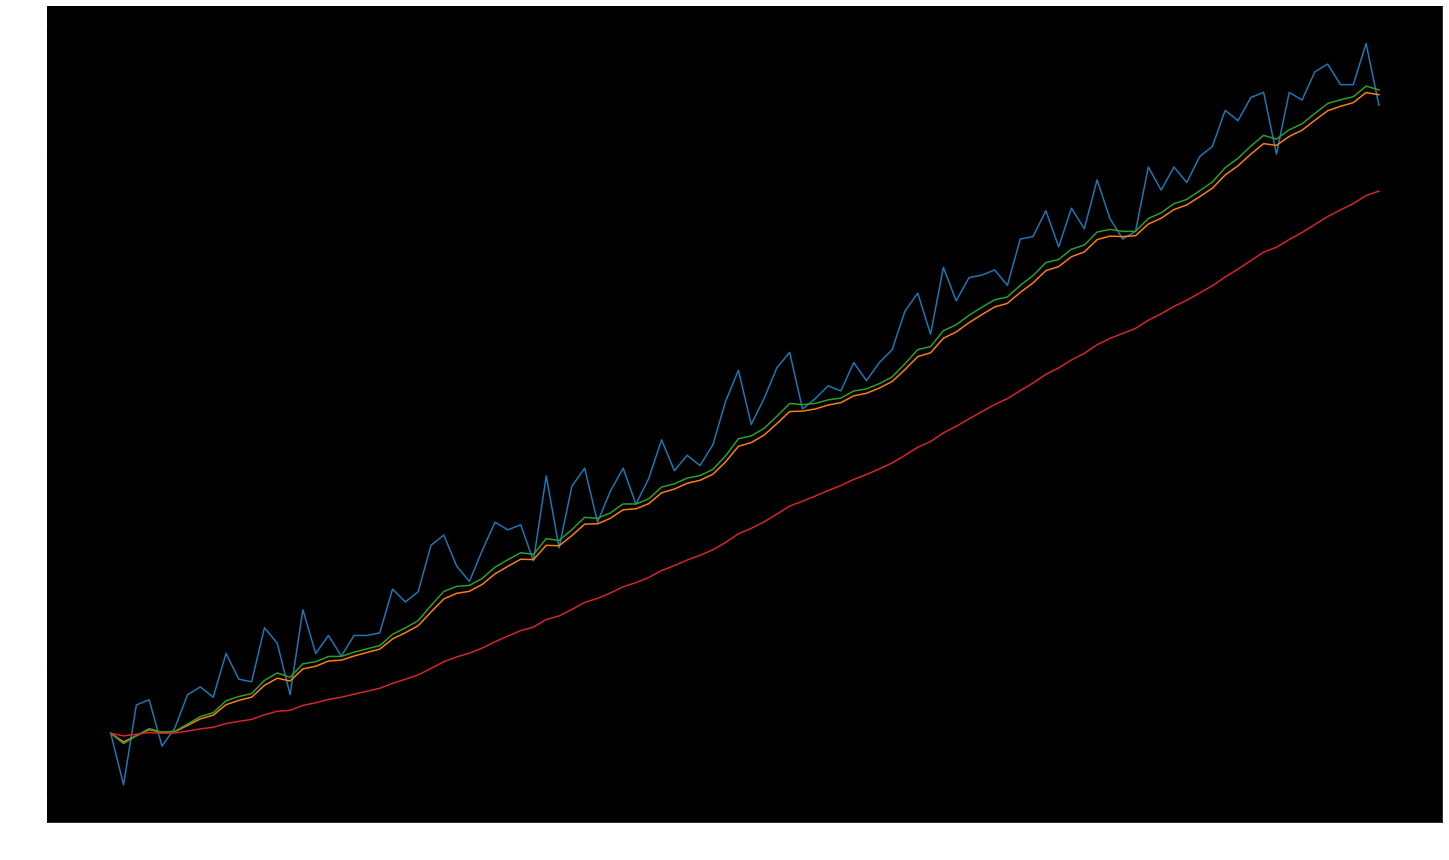

In [82]:
# цвета графика
plt.rcParams['axes.facecolor'] = 'black'
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.figure(figsize=(25, 15))
plt.plot('y', data = data_2)
plt.plot('y_exp_norm', data = data_2)
plt.plot('a=20', data = data_2)
plt.plot('a=5', data = data_2)

plt.xlabel('Time step')
plt.ylabel('y')
plt.show()

In [83]:
(data_2['y_exp_norm'] == data_2['a=20']).unique()

array([ True, False])

In [84]:
import numpy as np
X = data_2.index.to_numpy()
y = data_2['y'].to_numpy()
X

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [85]:
y

array([ 25,   5,  36,  38,  20,  27,  40,  43,  39,  56,  46,  45,  66,
        60,  40,  73,  56,  63,  55,  63,  63,  64,  81,  76,  80,  98,
       102,  90,  84,  96, 107, 104, 106,  92, 125,  97, 121, 128, 107,
       119, 128, 114, 124, 139, 127, 133, 129, 137, 154, 166, 145, 155,
       167, 173, 151, 155, 160, 158, 169, 162, 169, 174, 189, 196, 180,
       206, 193, 202, 203, 205, 199, 217, 218, 228, 214, 229, 221, 240,
       225, 217, 220, 245, 236, 245, 239, 249, 253, 267, 263, 272, 274,
       250, 274, 271, 282, 285, 277, 277, 293, 269])

In [86]:
poly = np.polyfit(X, y, 1)
print(poly)

[ 2.71581158 14.33151515]


In [93]:
a = round(poly[0], 2)
b = round(poly[1], 2)
a

2.72

In [88]:
x = np.arange(1, 101)
data_2['lin_trend'] = a * x + b
data_2

,y,y_exp_norm,a=20,a=5,lin_trend
1,25,25.000000,25.000000,25.000000,17.05
2,5,21.600000,21.000000,24.000000,19.77
3,36,24.048000,24.000000,24.600000,22.49
4,38,26.419840,26.800000,25.270000,25.21
5,20,25.328467,25.440000,25.006500,27.93
...,...,...,...,...,...
96,285,266.864902,269.656097,225.780764,275.45
97,277,268.587869,271.124877,228.341726,278.17
98,277,270.017931,272.299902,230.774640,280.89
99,293,273.924883,276.439922,233.885908,283.61


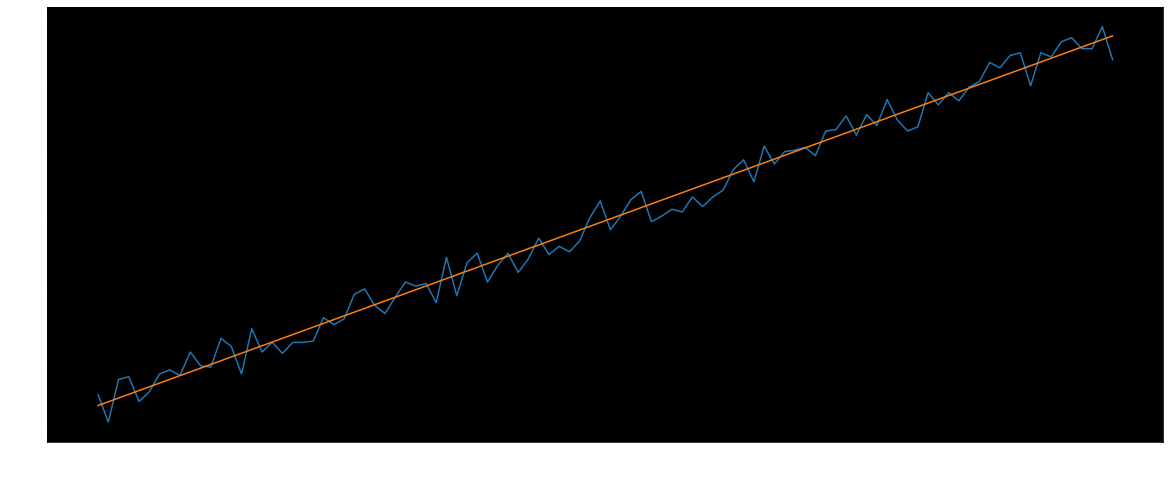

In [89]:
plt.figure(figsize=(20, 8))
plt.plot('y', data=data_2)
plt.plot('lin_trend', data=data_2)
plt.xlabel('Time step')
plt.ylabel('y')
plt.show()

In [92]:
f_i = data_2['lin_trend']
y_avg = data_2['y'].mean()
R2 = 1 - ((y - f_i) ** 2).sum() / ((y - y_avg) ** 2).sum()
round(R2, 2)

0.99

In [91]:
y_101 = a * 101 + b
round(y_101, 0)

289.0

In [115]:
#attestat

In [116]:
row = [33, 49, 38, 44, 48, 52, 37, 55, 39, 59, 41, 42, 54, 63, 53, 50, 47, 57, 58, 56, 51, 69, 64, 67, 75] 
row = pd.DataFrame(row)
row.index+=1
row.columns=['y']
print(row.shape)
row.describe()

(25, 1)


,y
count,25.000000
mean,52.040000
std,10.682852
min,33.000000
25%,44.000000
50%,52.000000
75%,58.000000
max,75.000000


In [117]:
import numpy as np
X = row.index.to_numpy()
y = row['y'].to_numpy()
poly = np.polyfit(X, y, 1)
print(poly)
a = round(poly[0], 2)
b = round(poly[1], 2)
a

[ 1.09615385 37.79      ]


1.1

In [118]:
x = np.arange(1, 26)
row['lin_trend'] = a * x + b
row

,y,lin_trend
1,33,38.89
2,49,39.99
3,38,41.09
4,44,42.19
5,48,43.29
6,52,44.39
7,37,45.49
8,55,46.59
9,39,47.69
10,59,48.79


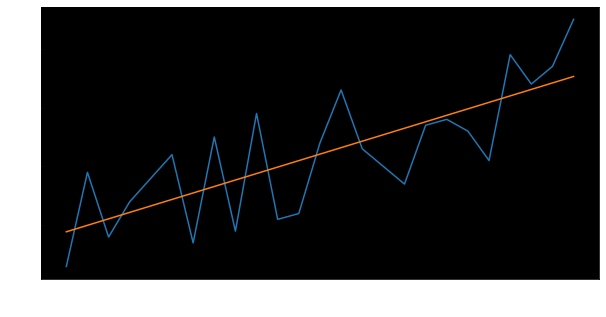

In [119]:
plt.figure(figsize=(10, 5))
plt.plot('y', data=row)
plt.plot('lin_trend', data=row)
plt.xlabel('Time step')
plt.ylabel('y')
plt.show()

In [122]:
f_i = row['lin_trend']
y_avg = row['y'].mean()
R2 = 1 - ((y - f_i) ** 2).sum() / ((y - y_avg) ** 2).sum()
round(R2, 3)

0.57

In [19]:
# homework SMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data_3 = pd.read_csv('quiz_5_2_2_data.csv', names=['id','value'])
data_3 = data_3.set_index('id')
data_3

,value
id,
1,34
2,32
3,37
4,33
5,38
6,35
7,39
8,34
9,39


In [26]:
# updating our dataFrame to have only
# one column 'Close' as rest all columns
# are of no use for us at the moment
# using .to_frame() to convert pandas series
# into dataframe.
#reliance = reliance['Close'].to_frame()
 
# calculating simple moving average
# using .rolling(window).mean() ,
# with window size = 30

data_3['SMA3'] = data_3['value'].rolling(3,center=True).mean()
data_3['SMA7'] = data_3['value'].rolling(7, center=True).mean()

# !!! removing all the NULL values using
# dropna() method
#data_3.dropna(inplace=True)
 
# printing Dataframe
round(data_3,2)

,value,SMA3,SMA7
id,,,
1,34,NaN,NaN
2,32,34.33,NaN
3,37,34.00,NaN
4,33,36.00,35.43
5,38,35.33,35.43
6,35,37.33,36.43
7,39,36.00,36.14
8,34,37.33,36.71
9,39,36.00,35.86


<AxesSubplot:xlabel='id'>

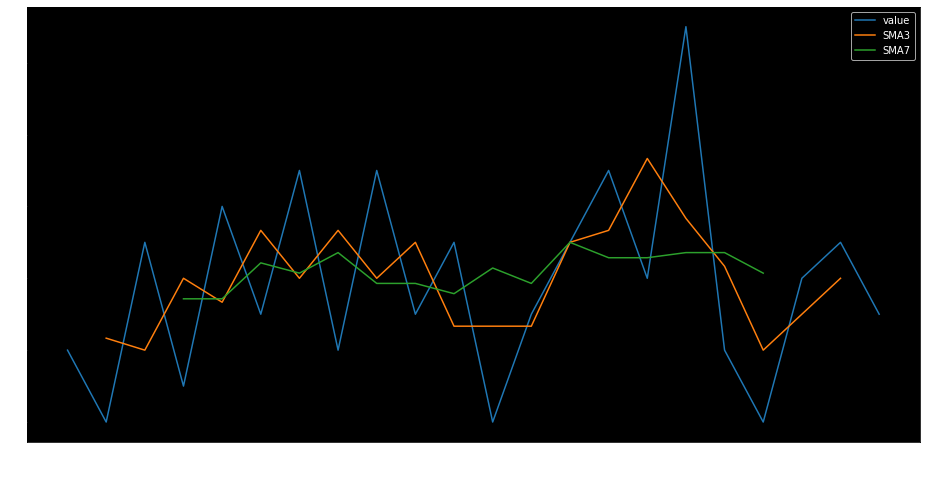

In [30]:
# цвета графика
plt.rcParams['axes.facecolor'] = 'black'
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

data_3[['value', 'SMA3','SMA7']].plot(label='value',
                                  figsize=(16, 8))

In [5]:
# homework EMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data_3 = pd.read_csv('quiz_5_2_2_data.csv', names=['id','value'])
data_3 = data_3.set_index('id')
data_3['y_exp_norm_a01'] = data_3['value'].ewm(alpha = 0.1, adjust = False).mean()
data_3['y_exp_norm_a03'] = data_3['value'].ewm(alpha = 0.3, adjust = False).mean()
round(data_3,2)


,value,y_exp_norm_a01,y_exp_norm_a03
id,,,
1,34,34.00,34.00
2,32,33.80,33.40
3,37,34.12,34.48
4,33,34.01,34.04
5,38,34.41,35.23
6,35,34.47,35.16
7,39,34.92,36.31
8,34,34.83,35.62
9,39,35.25,36.63


<AxesSubplot:xlabel='id'>

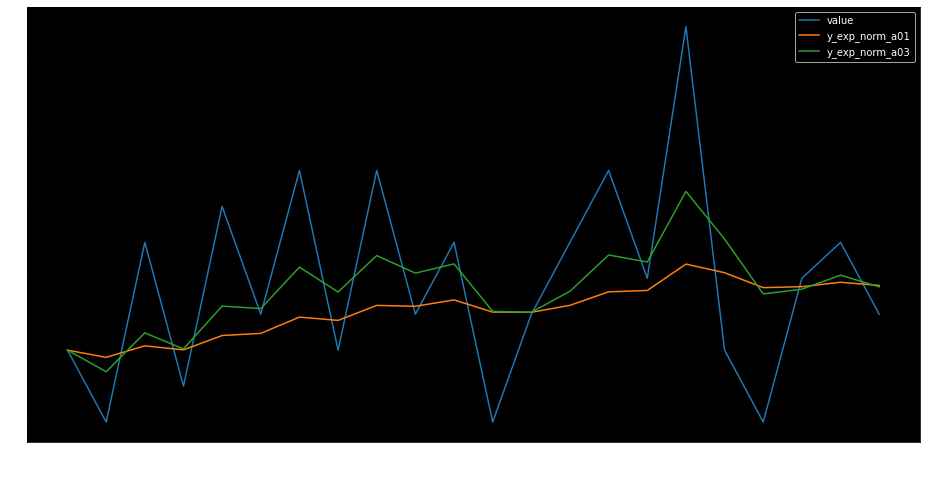

In [4]:
plt.rcParams['axes.facecolor'] = 'black'
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

data_3[['value', 'y_exp_norm_a01','y_exp_norm_a03']].plot(label='value',
                                  figsize=(16, 8))